In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
original = cv.VideoCapture('./1tagvideo.mp4')
if (original.isOpened() == False):
	print("Error opening the video file")
else:
  # Get fps
  fps = int(original.get(5))
  print("Frame Rate is ",fps,"frames per second")	
  # Get total frame count
  frame_count = original.get(7)
  print("Frame count : ", frame_count)



Frame Rate is  26 frames per second
Frame count :  787.0


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f47fe0bd6a0>)

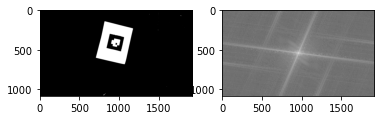

In [7]:
frames = []
while(original.isOpened()):
	
  ret, frame = original.read()
  if ret == True:
    # Split the channels and invert color of the frame 
    frames.append(frame)
    break
  else:
    break

red_ch = frames[0]
gray_img = cv.cvtColor(red_ch, cv.COLOR_BGR2GRAY)
gray_img = cv.medianBlur(gray_img,5) # Remove noise

gaussian = np.array([[-1,-2,-1], [-2 ,13.5,-2], [-1,-2,-1]])
gray_img = cv.filter2D(gray_img,-1,gaussian) # Sharpen the image to get better edges
gray_img = np.float32(gray_img>160) # Applying a threshold

fft_img= np.fft.fft2(gray_img) # Finding FFT
fft_img = np.fft.fftshift(fft_img)
mag = 20*np.log(np.abs(fft_img))

plt.subplot(2,2,1),plt.imshow(gray_img,"gray")
plt.subplot(2,2,2),plt.imshow(mag,"gray")

/tmp/ipykernel_27824/2816117543.py:12: RuntimeWarning: divide by zero encountered in log
  ifft_mag = 20*np.log(np.abs(fft_bp))   #Masked FFT magnitude


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f4826eccd30>)

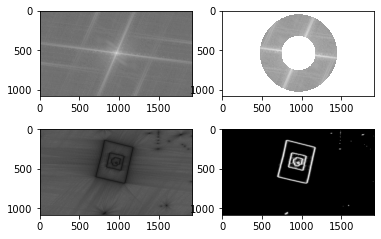

In [8]:
rows, cols = gray_img.shape
center_row, center_col = int(rows/2), int(cols/2)       
bp_mask = np.zeros((rows, cols), np.uint8) # Make a mask for bandpass filtering
size1 = 200
size2 = 500
x, y = np.ogrid[:rows, :cols]
bandpass_filter = np.logical_and(((x - center_row) ** 2 + (y - center_col) ** 2 >= size1 ** 2),((x - center_row) ** 2 + (y - center_col) ** 2 <= size2 ** 2))                     
bp_mask[bandpass_filter] = 1   

# Apply the mask to the FFT
fft_bp = fft_img*bp_mask
ifft_mag = 20*np.log(np.abs(fft_bp))   #Masked FFT magnitude

fft_bp = np.fft.ifftshift(fft_bp)         
fft_bp = np.fft.ifft2(fft_bp)     #Perform the inverse FFT

plt.subplot(2,2,1),plt.imshow(mag,"gray")
mag = -np.log(np.abs(fft_bp))    #Scale the magnitude of the image
mag *= (255.0/mag.max())    #Normalize the image
filtered_mag = np.float32(np.abs(mag-255)>215)  #Threshold and invert the image


plt.subplot(2,2,2),plt.imshow(ifft_mag,"gray")  
plt.subplot(2,2,3),plt.imshow(mag,"gray") 
plt.subplot(2,2,4),plt.imshow(np.float32(filtered_mag),"gray")    